### Analysis on the given dataset having information on individuals and the premium paid for a health insurance

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import klib

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading data

In [2]:
data = pd.read_csv('insurance_premium.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,28,female,25.9,1,no,northwest,4133.64
1,24,female,20.5,0,yes,northeast,14571.89
2,61,male,36.1,3,no,southwest,27941.29
3,21,male,31.1,0,no,southwest,1526.31
4,33,female,33.5,0,yes,southwest,37079.37


Summary of the data

In [3]:
print('The shape of the data is : ', data.shape)

The shape of the data is :  (1337, 7)


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.3 KB


In [5]:
# Using Kblib conver data types reduces memory
data = klib.convert_datatypes(data)
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int8    
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float32 
 3   children  1337 non-null   int8    
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   expenses  1337 non-null   float32 
dtypes: category(3), float32(2), int8(2)
memory usage: 17.9 KB


In [6]:
print('The number of null values in each of the columns of the given dataset :')
data.isnull().sum()

The number of null values in each of the columns of the given dataset :


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

##### There are no null values in the dataset

In [7]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665556,1.095737,13279.130859
std,14.044333,6.100664,1.205571,12110.357422
min,18.000000,16.000000,0.000000,1121.869995
25%,27.000000,26.299999,0.000000,4746.339844
50%,39.000000,30.400000,1.000000,9386.160156
75%,51.000000,34.700001,2.000000,16657.720703
max,64.000000,53.099998,5.000000,63770.429688


In [8]:
# Values for each column
for col in data.select_dtypes('category'):
    print('For col ', col, data[col].unique())

For col  sex [female, male]
Categories (2, object): [female, male]
For col  smoker [no, yes]
Categories (2, object): [no, yes]
For col  region [northwest, northeast, southwest, southeast]
Categories (4, object): [northwest, northeast, southwest, southeast]


Detecting outliers

<AxesSubplot:ylabel='age'>

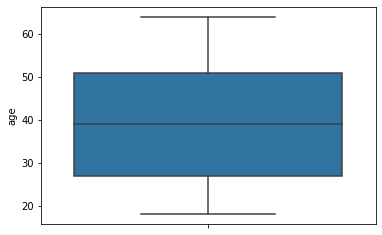

In [9]:
sns.boxplot(y='age', data=data)

<AxesSubplot:ylabel='bmi'>

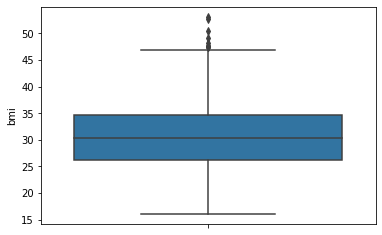

In [10]:
sns.boxplot(y='bmi', data=data)

<AxesSubplot:ylabel='children'>

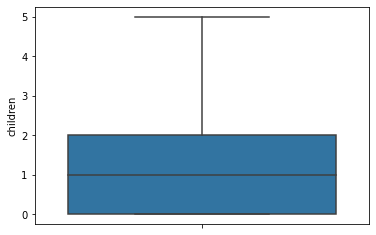

In [11]:
sns.boxplot(y='children', data=data)

<AxesSubplot:ylabel='expenses'>

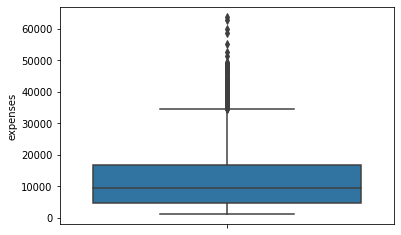

In [12]:
sns.boxplot(y='expenses', data=data)

Univariate Analysis

<AxesSubplot:xlabel='expenses', ylabel='Density'>

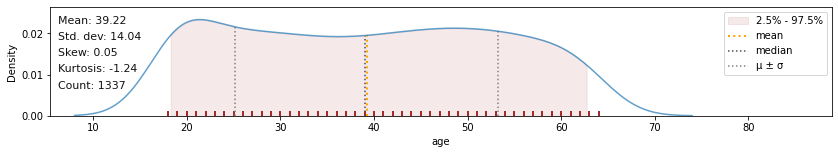

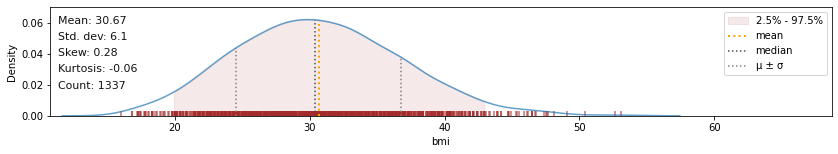

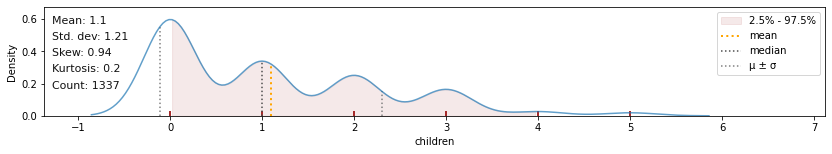

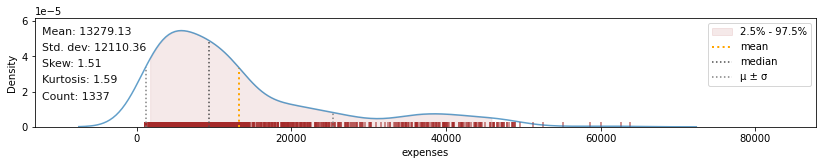

In [13]:
klib.dist_plot(data)

##### The expenses column (target) is positively skewed. 

<AxesSubplot:xlabel='expenses', ylabel='Density'>

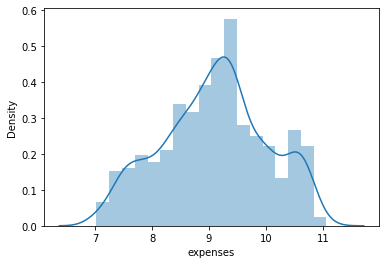

In [14]:
# Transforming using log
target = np.log(data['expenses'])
sns.distplot(target)

Bivariate and Multivariate Analysis

Text(0.5, 1.0, 'Premium Paid through different ages')

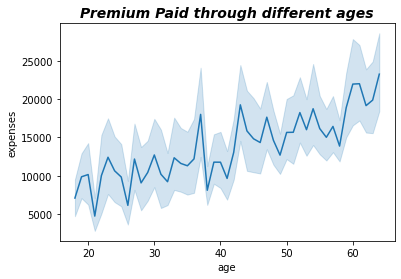

In [15]:
sns.lineplot(x='age', y='expenses', data=data)
plt.title('Premium Paid through different ages', fontsize=14,
            fontstyle='italic', fontweight='bold')

##### The premium value paid increases as the age goes up.

Text(0.5, 1.0, 'Expenses across age per gender')

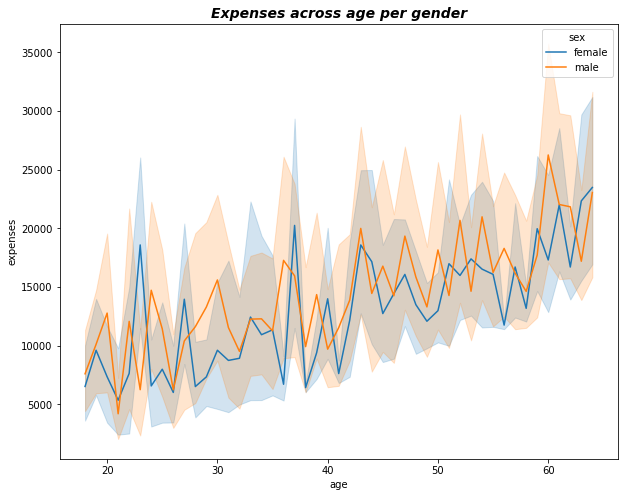

In [16]:
plt.figure(figsize=[10,8])
sns.lineplot(x='age', y='expenses', data=data, hue='sex')
plt.title('Expenses across age per gender', fontsize=14,
            fontstyle='italic', fontweight='bold')

##### The premium value paid increases as the age goes up for males and females.

In [17]:
for i in range(len(data)):
    if data['age'][i] <= 20:
        data.loc[i, 'age_band'] = 'Below 20'
    if data['age'][i] >= 21 and data['age'][i] <= 30:
        data.loc[i, 'age_band'] = 'Between 21-30'
    if data['age'][i] >= 31 and data['age'][i] <= 40:
        data.loc[i, 'age_band'] = 'Between 31-40'
    if data['age'][i] >= 41 and data['age'][i] <= 50:
        data.loc[i, 'age_band'] = 'Between 41-50'
    if data['age'][i] >= 51 and data['age'][i] <= 60:
        data.loc[i, 'age_band'] = 'Between 51-60'
    if data['age'][i] >= 61:
        data.loc[i, 'age_band'] = 'Above 60'

data.head()

,age,sex,bmi,children,smoker,region,expenses,age_band
0,28,female,25.900000,1,no,northwest,4133.640137,Between 21-30
1,24,female,20.500000,0,yes,northeast,14571.889648,Between 21-30
2,61,male,36.099998,3,no,southwest,27941.289062,Above 60
3,21,male,31.100000,0,no,southwest,1526.310059,Between 21-30
4,33,female,33.500000,0,yes,southwest,37079.371094,Between 31-40


In [18]:
data_sorted = data.sort_values(by='age')
data_sorted.head()

,age,sex,bmi,children,smoker,region,expenses,age_band
127,18,female,27.299999,3,yes,southeast,18223.449219,Below 20
927,18,male,25.500000,0,no,northeast,1708.000000,Below 20
1195,18,female,28.200001,0,no,northeast,2200.830078,Below 20
1100,18,female,26.700001,0,no,southeast,1615.770020,Below 20
652,18,female,37.299999,1,no,southeast,2219.449951,Below 20


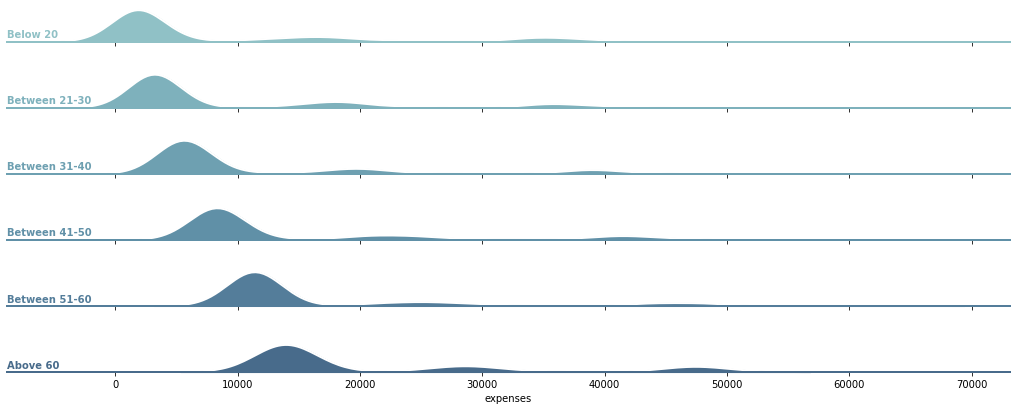

In [25]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data_sorted, row='age_band', hue='age_band', aspect=15, height=1, palette=pal)

# Draw the densities
g.map(sns.kdeplot, 'expenses',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'expenses', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va="center", transform=ax.transAxes)

g.map(label, 'expenses')

# Set the subplots to overlap
#g.figure.subplots_adjust(hspace=-.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='')
g.despine(bottom=True, left=True)

###### As the age increases the start value for premium increases but most of the population pay premium in the lower range.

Text(0.5, 1.0, 'Premium Paid across bmi values')

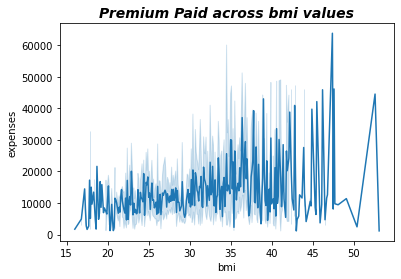

In [26]:
sns.lineplot(x='bmi', y='expenses', data=data)
plt.title('Premium Paid across bmi values', fontsize=14,
            fontstyle='italic', fontweight='bold')

##### Premium values varies randomly with bmi.

In [27]:
import matplotlib as mpl

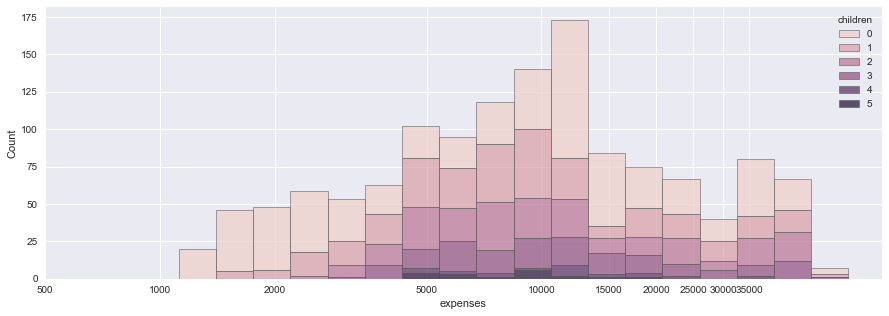

In [29]:
plt.style.use("seaborn")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    data,
    x='expenses', hue='children',
    multiple="stack",
#    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000, 15000, 20000, 25000, 30000, 35000])

##### Most of the people have either 0 ot 1 or 2 number of children. People paying less premium have 0 or 1 number of children. Most of the people pay premium in the range of 5000 - 15000. 

In [31]:
pivot_expenses_per_age = data.pivot_table(index='age', values='expenses', aggfunc=np.mean)
pivot_expenses_per_age = pivot_expenses_per_age.reset_index()
pivot_expenses_per_age

,age,expenses
0,18,7086.217773
1,19,9868.929688
2,20,10159.698242
3,21,4730.464355
4,22,10012.932617
5,23,12419.820312
6,24,10648.015625
7,25,9838.365234
8,26,6133.825684
9,27,12184.701172


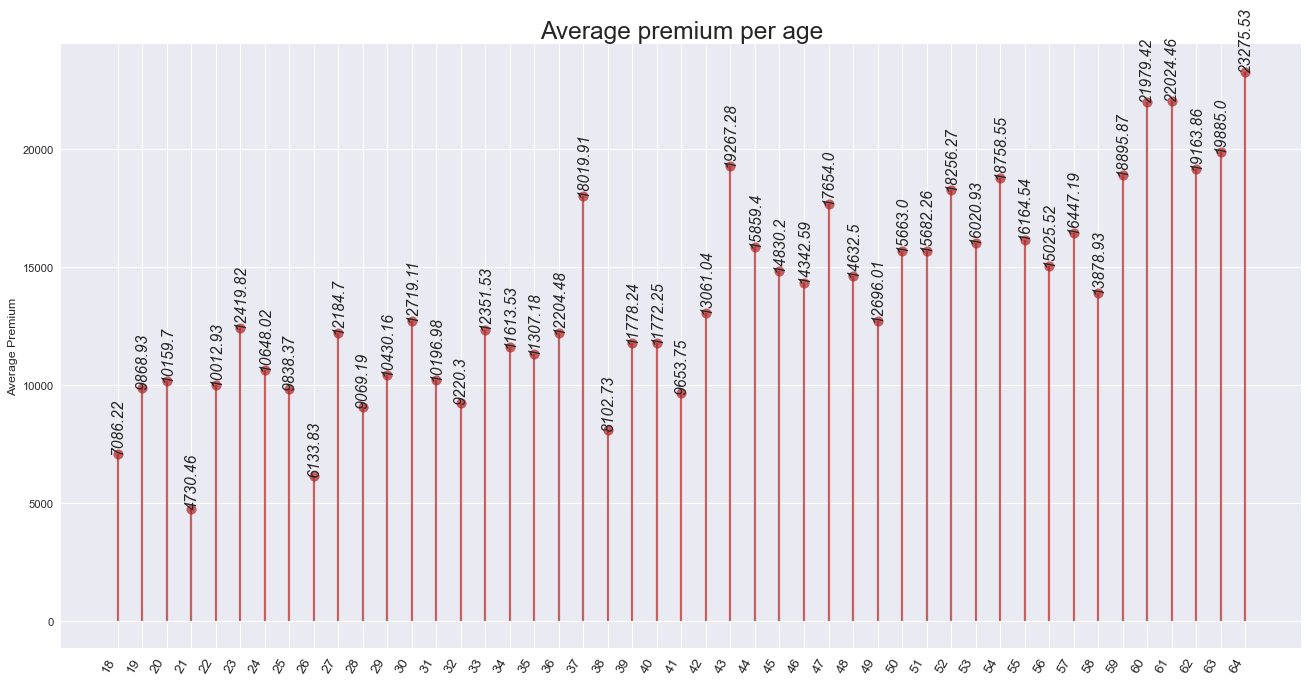

In [32]:
# Draw plot
fig, ax = plt.subplots(figsize=(20,10), dpi= 80)
ax.vlines(x=pivot_expenses_per_age.index, ymin=0, ymax=pivot_expenses_per_age.expenses, color='firebrick', alpha=0.7, 
          linewidth=2)
ax.scatter(x=pivot_expenses_per_age.index, y=pivot_expenses_per_age.expenses, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Average premium per age', fontdict={'size':22})
ax.set_ylabel('Average Premium')
ax.set_xticks(pivot_expenses_per_age.index)
ax.set_xticklabels(pivot_expenses_per_age.age, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
#ax.set_ylim(0, 65)

# Annotate
for row in pivot_expenses_per_age.itertuples():
    ax.text(row.Index, row.expenses+.5, s=round(row.expenses, 2), horizontalalignment= 'center', verticalalignment='bottom', 
            fontsize=14, rotation=90, fontstyle='italic')

plt.show()

##### Above graph shows the average premium paid per age.

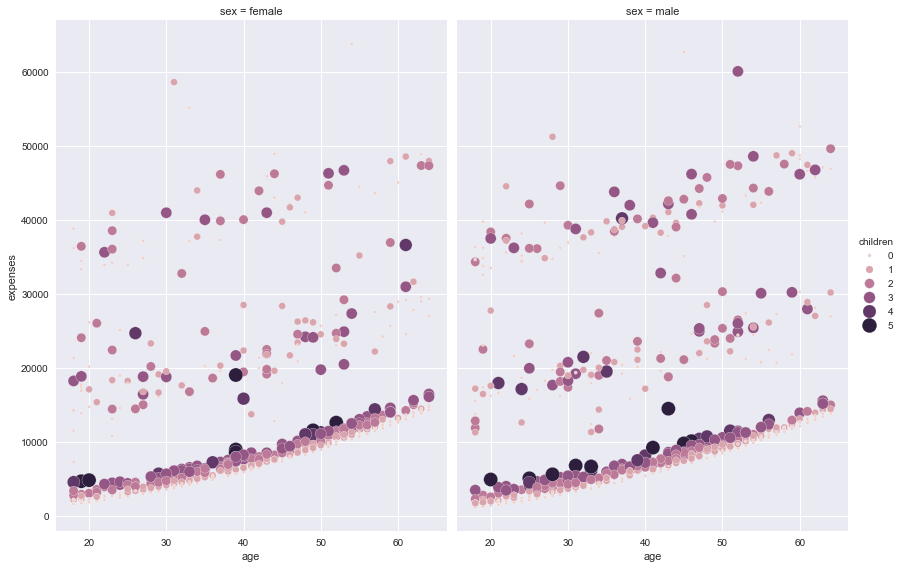

In [33]:
sns.relplot(
    data=data,
    x='age', y='expenses',
    hue='children', size='children', col='sex',
    height=8, aspect=.75, facet_kws=dict(sharex=False),sizes=(10, 200)
)

##### Above graph shows expenses across age per children number for male and female. Most of the people are stacked in the range of expense 5000-15000 as observed above and have less 4-5 number of children. The spread seems to be similar for male and female.

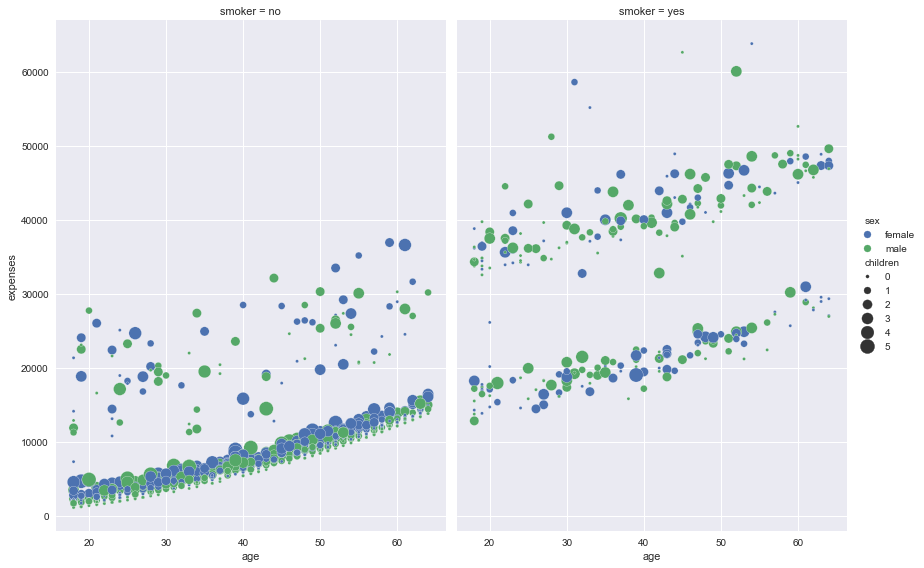

In [34]:
sns.relplot(
    data=data,
    x='age', y='expenses',
    hue='sex', size='children', col='smoker',
    height=8, aspect=.75, facet_kws=dict(sharex=False),sizes=(10, 200)
)

##### Majority of the population falls under non smoker category and the people who are smoker seem to be paying more premium in comparision to non smokers.

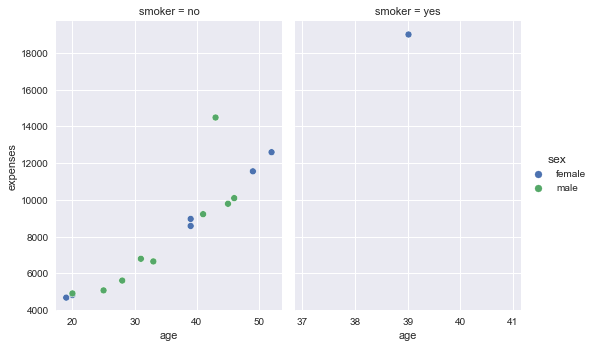

In [54]:
plt.style.use("seaborn")

sns.relplot(
    data=data[data['children']==5],
    x='age', y='expenses',
    hue='sex', col='smoker',
    height=5, aspect=.75, facet_kws=dict(sharex=False)
)

##### Per the data, people with 5 number of children are more for non smokers and permium increases as age increases.

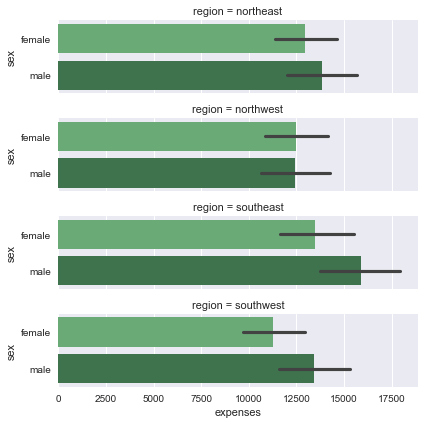

In [36]:
g = sns.catplot(x='expenses', y='sex', row='region',
                kind='bar', height=1.5, aspect=4,
                data=data, palette='Greens_d')

##### Males from southwest region are paying high premium where as females across the four regions are paying similar premium.

### Studying data under age paying maximum and minimum average premium

In [37]:
pivot_expenses_per_age.sort_values(by='expenses', ascending=False, inplace=True)
pivot_expenses_per_age.head()

,age,expenses
46,64,23275.531250
43,61,22024.457031
42,60,21979.419922
45,63,19885.000000
25,43,19267.279297


In [38]:
pivot_expenses_per_age.tail()

,age,expenses
10,28,9069.187500
20,38,8102.732910
0,18,7086.217773
8,26,6133.825684
3,21,4730.464355


Maxmium average premium age: 64 and 
Minimum average premium age: 21

In [40]:
# Extracting data for ages 64 and 21
data_age_64 = data[data['age']==64]
data_age_21 = data[data['age']==21]

For Age 64

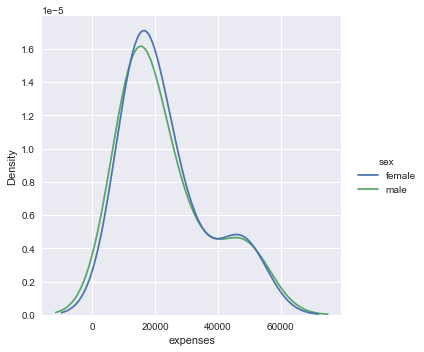

In [41]:
sns.displot(data_age_64, x='expenses', hue='sex', kind='kde')

##### The distribution of expenses is similar for both male and female.

Text(0.5, 1.0, 'Population with age 64 years')

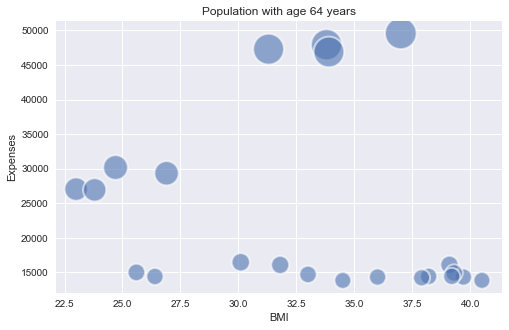

In [42]:
# Scatterplot
plt.figure(figsize=[8,5])
plt.scatter(
    x = data_age_64['bmi'], 
    y = data_age_64['expenses'], 
    s=data_age_64['expenses']/50, 
#    c=data1952['continent'].cat.codes, 
#    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);

# Add titles (main and on axis)
#plt.yscale('log')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('Population with age 64 years')
#plt.ylim(0,50000)
#plt.xlim(30, 75);

##### Above plot shows the relation between BMI and expense for this age.

<AxesSubplot:xlabel='region', ylabel='expenses'>

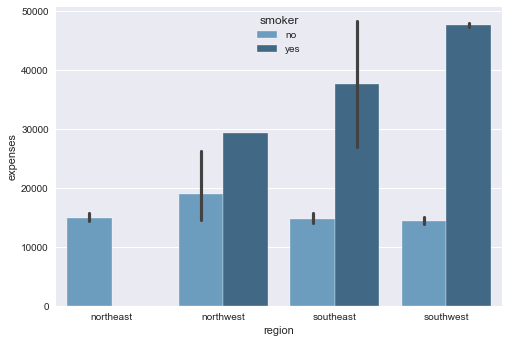

In [48]:
sns.barplot(x='region', y='expenses', hue='smoker', data=data_age_64, palette='Blues_d')

##### People from northwest, southeast, southwest have smokers paying a high premium and northeast regions have all non smokers for this age.

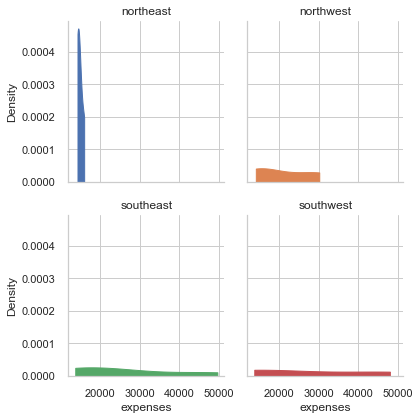

In [44]:
sns.set(style="whitegrid")

g = sns.FacetGrid(data_age_64, col='region', hue='region', col_wrap=2)
g = g.map(sns.kdeplot,'expenses', cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g = g.set_titles("{col_name}")

plt.show()

##### The premium distribution for northeast region is concentrated in the lower region while its spread out for other regions for this age.

<AxesSubplot:xlabel='expenses', ylabel='Count'>

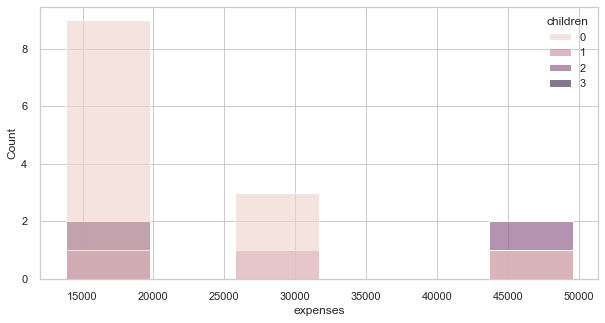

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_age_64, x='expenses', hue='children', fill=True, common_norm=False, alpha=0.6, legend=True)

##### More people at this age have less number of children and pay less premium as per the data.

For age 21

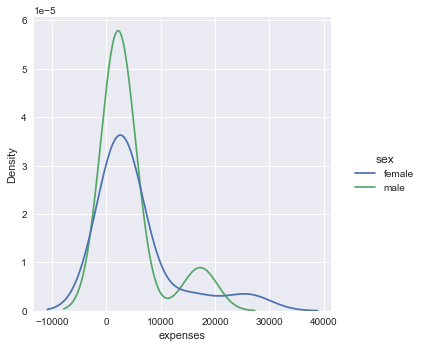

In [47]:
plt.style.use("seaborn")
sns.displot(data_age_21, x='expenses', hue='sex', kind='kde')

##### The distribution of expenses differes for both male and female. 

Text(0.5, 1.0, 'Population with age 21 years')

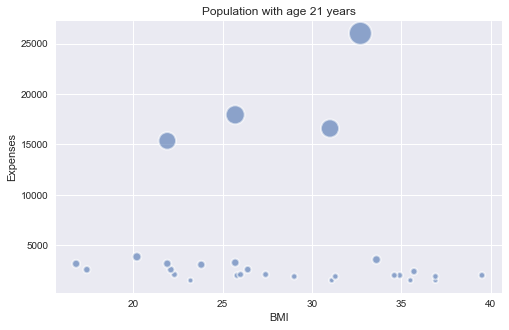

In [49]:
# Scatterplot
plt.figure(figsize=[8,5])
plt.scatter(
    x = data_age_21['bmi'], 
    y = data_age_21['expenses'], 
    s=data_age_21['expenses']/50, 
#    c=data1952['continent'].cat.codes, 
#    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);

# Add titles (main and on axis)
#plt.yscale('log')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('Population with age 21 years')
#plt.ylim(0,50000)
#plt.xlim(30, 75);

##### Above plot shows the relation between BMI and expense for this age.

<AxesSubplot:xlabel='region', ylabel='expenses'>

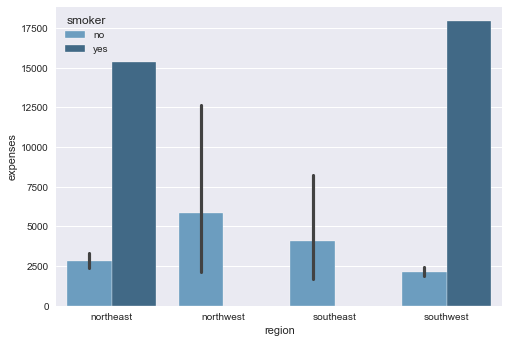

In [50]:
sns.barplot(x='region', y='expenses', hue='smoker', data=data_age_21, palette='Blues_d')

##### People from northeast and southwest have smokers paying a high premium and northwest and southeast regions have all non smokers for this age.

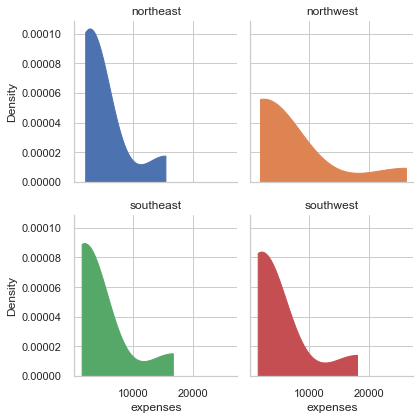

In [51]:
sns.set(style="whitegrid")

g = sns.FacetGrid(data_age_21, col='region', hue='region', col_wrap=2)
g = g.map(sns.kdeplot,'expenses', cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g = g.set_titles("{col_name}")

plt.show()

##### Expense distribution is similar for northeast, southeast and southwest and differs slightly when compared with northwest region.

<AxesSubplot:xlabel='expenses', ylabel='Count'>

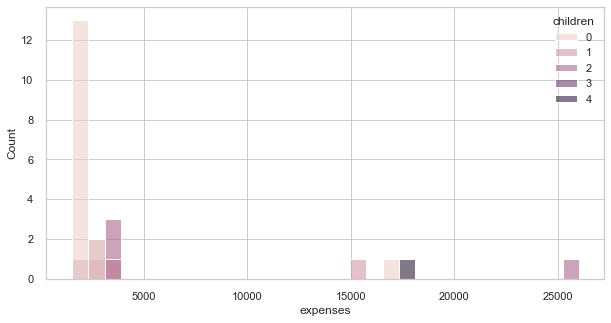

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_age_21, x='expenses', hue='children', fill=True, common_norm=False, alpha=0.6, legend=True)

##### More people at this age have less number of children and pay less premium as per the data. It also has a small chuck of population with 4 number of children paying premium between 15000-20000. 